In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
df.shape

(309, 16)

In [4]:
#Checking for Duplicates
df.duplicated().sum()

33

In [5]:
#Removing Duplicates
df=df.drop_duplicates()

In [6]:
#Checking for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [8]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [9]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [10]:
#Let's check what's happened now
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int32
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


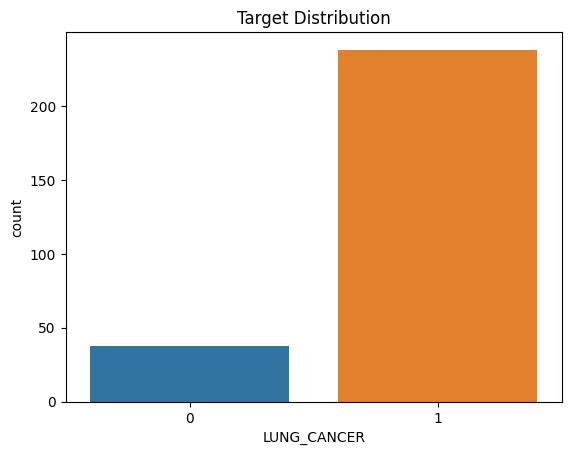

In [12]:
#Let's check the distributaion of Target variable.
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

In [13]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

In [14]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

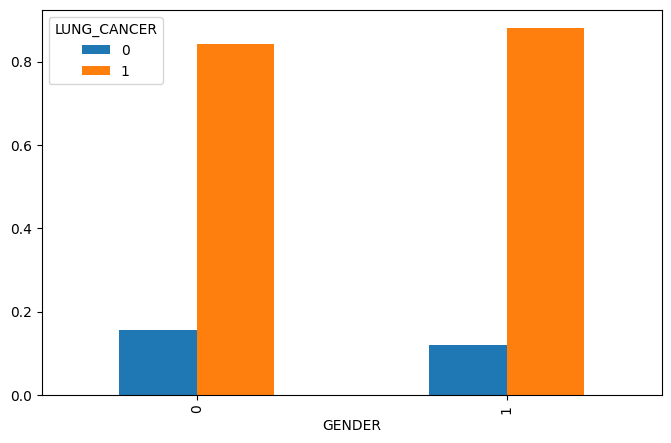

In [15]:
plot('GENDER')

<Axes: xlabel='AGE'>

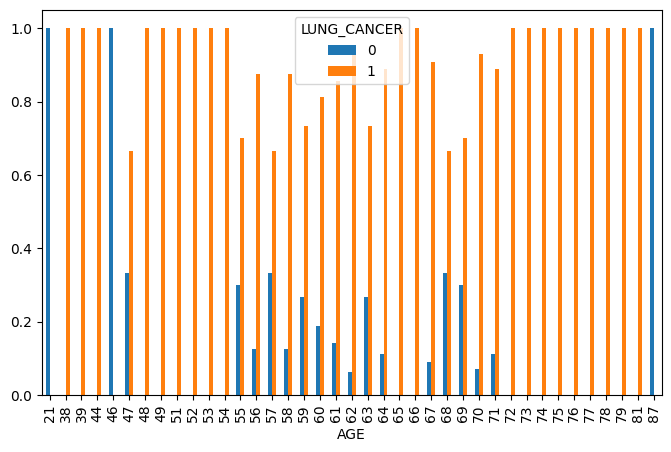

In [16]:
plot('AGE')

<Axes: xlabel='SMOKING'>

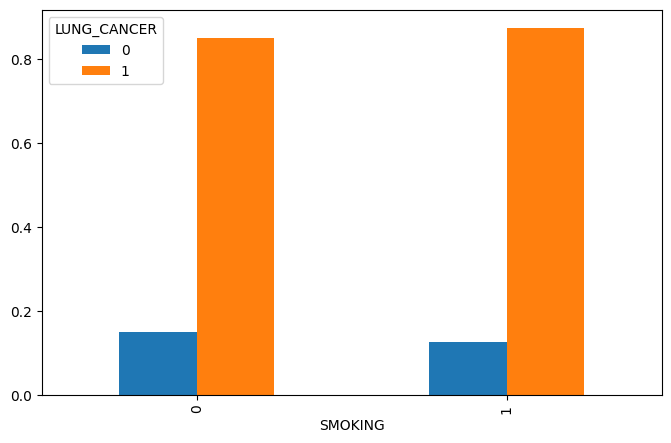

In [17]:
plot('SMOKING')

<Axes: xlabel='YELLOW_FINGERS'>

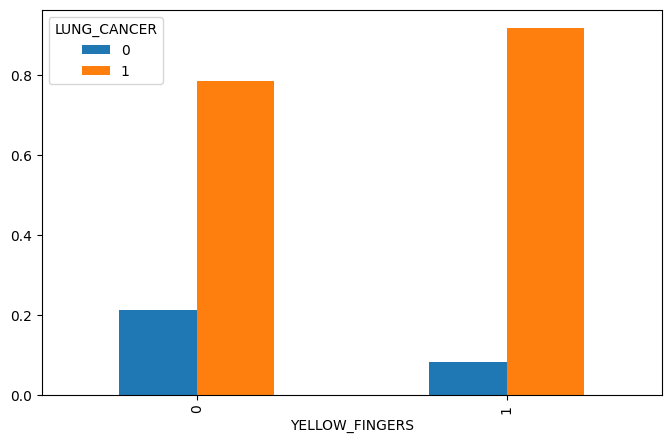

In [18]:
plot('YELLOW_FINGERS')

<Axes: xlabel='ANXIETY'>

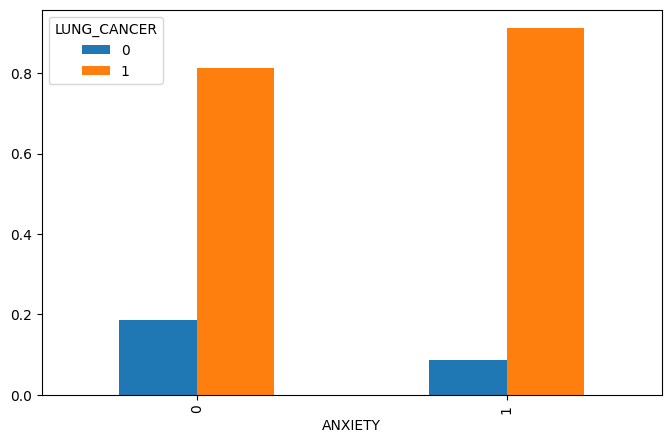

In [19]:
plot('ANXIETY')

<Axes: xlabel='PEER_PRESSURE'>

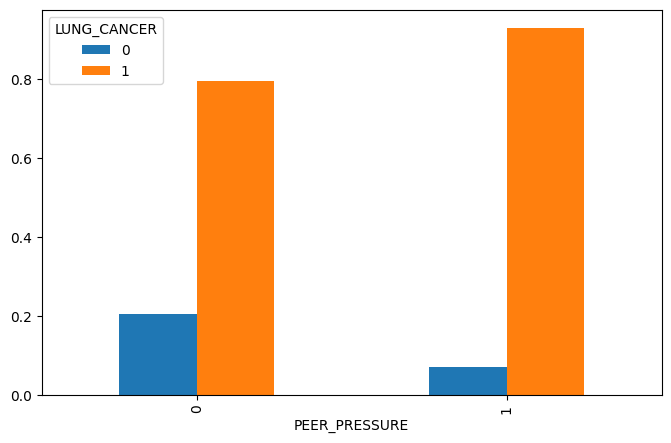

In [20]:
plot('PEER_PRESSURE')

<Axes: xlabel='CHRONIC DISEASE'>

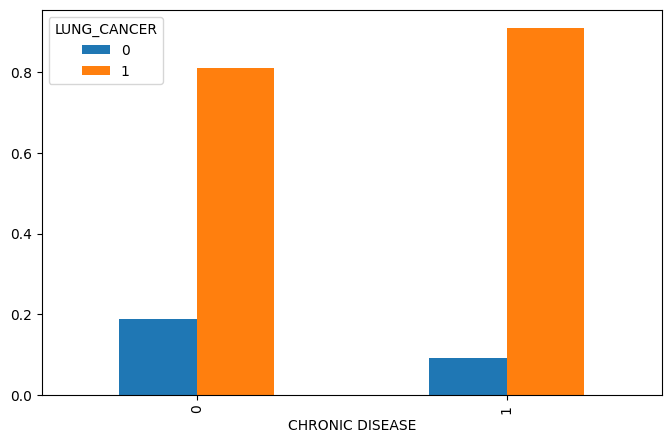

In [21]:
plot('CHRONIC DISEASE')

<Axes: xlabel='FATIGUE '>

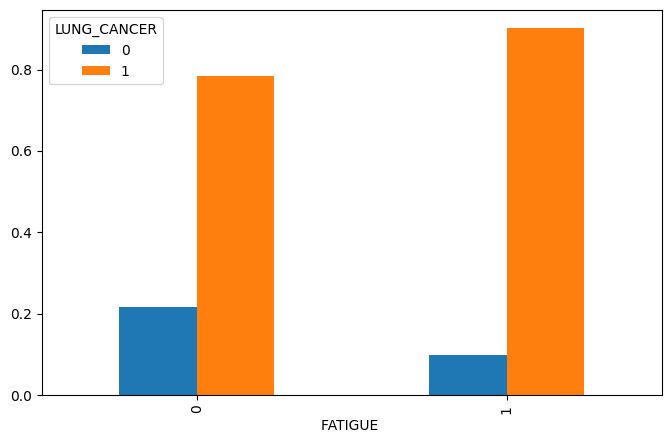

In [22]:
plot('FATIGUE ')

<Axes: xlabel='ALLERGY '>

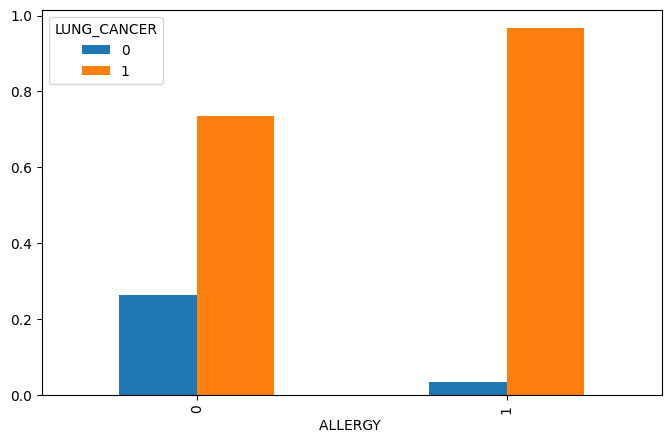

In [23]:
plot('ALLERGY ')

<Axes: xlabel='WHEEZING'>

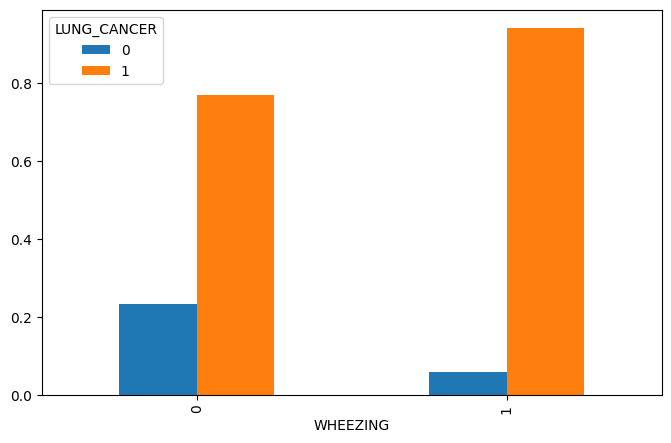

In [24]:
plot('WHEEZING')

<Axes: xlabel='ALCOHOL CONSUMING'>

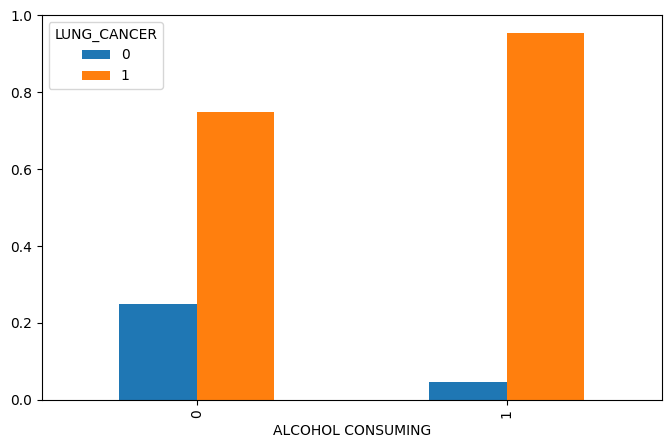

In [25]:
plot('ALCOHOL CONSUMING')

<Axes: xlabel='COUGHING'>

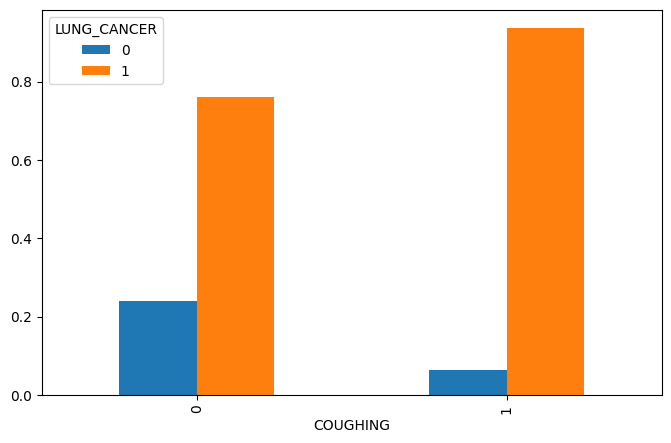

In [26]:
plot('COUGHING')

<Axes: xlabel='SHORTNESS OF BREATH'>

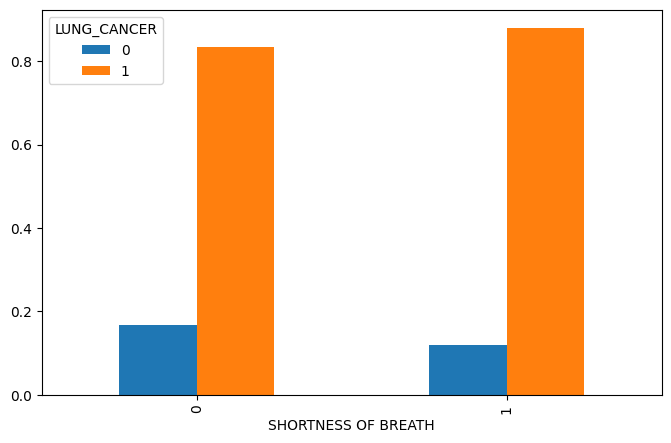

In [27]:
plot('SHORTNESS OF BREATH')

<Axes: xlabel='SWALLOWING DIFFICULTY'>

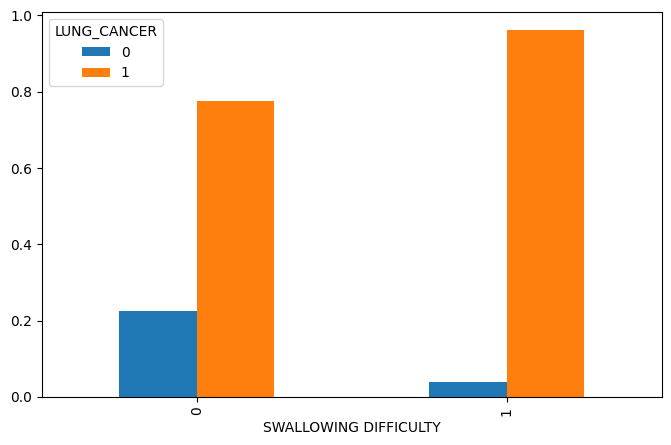

In [28]:
plot('SWALLOWING DIFFICULTY')

<Axes: xlabel='CHEST PAIN'>

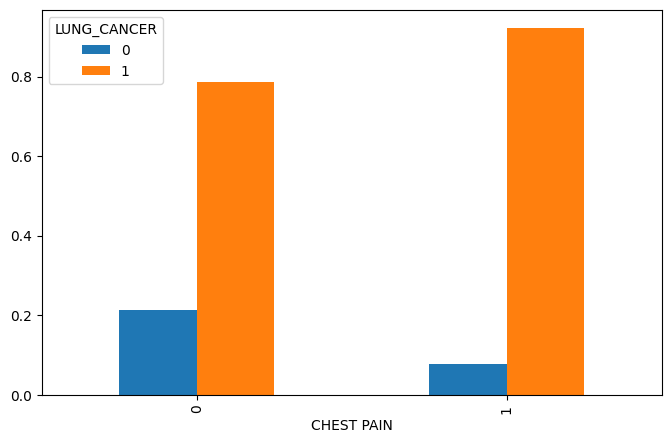

In [29]:
plot('CHEST PAIN')

In [30]:
df_new=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1
280,0,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,0,1,1,0


In [31]:
#Finding Correlation
cn=df_new.corr()
cn

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
YELLOW_FINGERS,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
ANXIETY,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655,0.195086
CHRONIC DISEASE,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
FATIGUE,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
ALLERGY,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
WHEEZING,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
COUGHING,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
SWALLOWING DIFFICULTY,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940


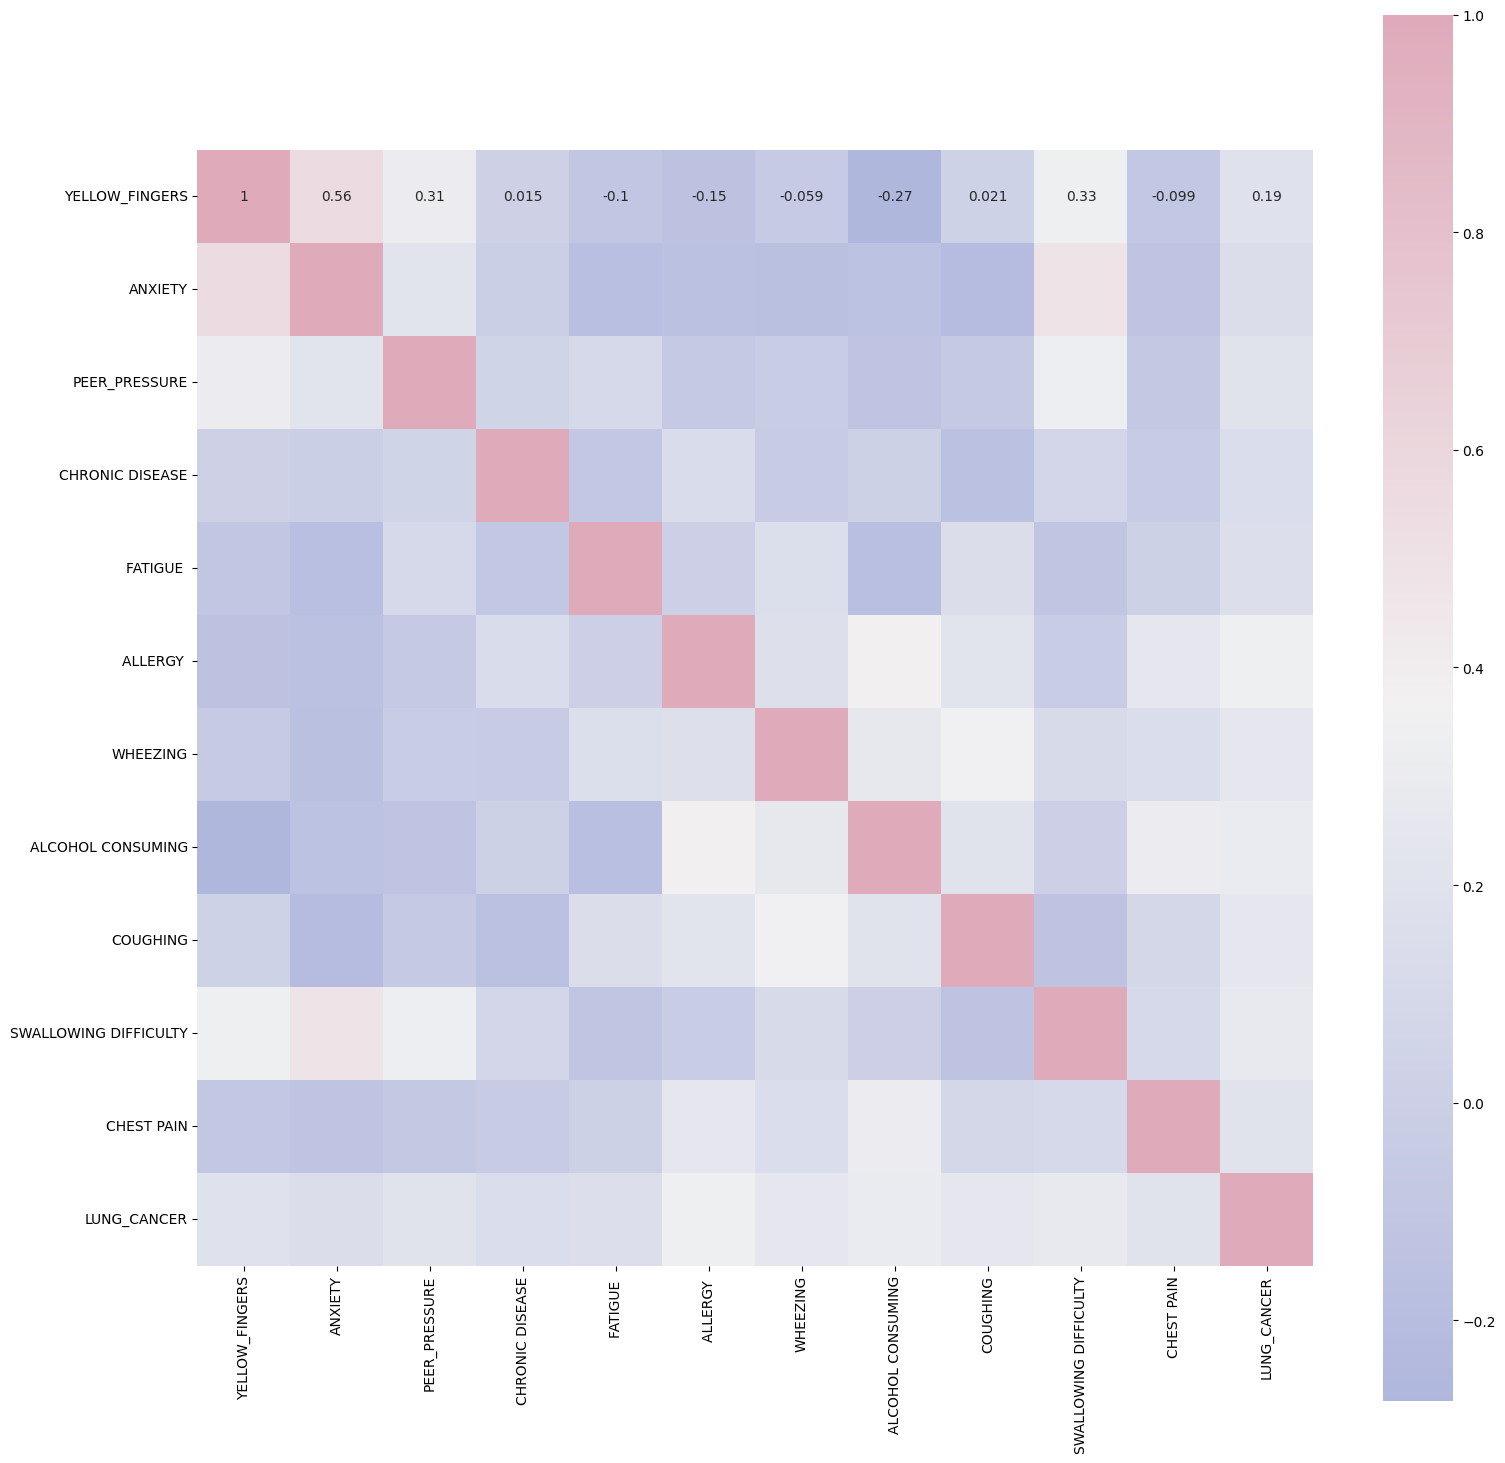

In [32]:
#Correlation 
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()


<Axes: >

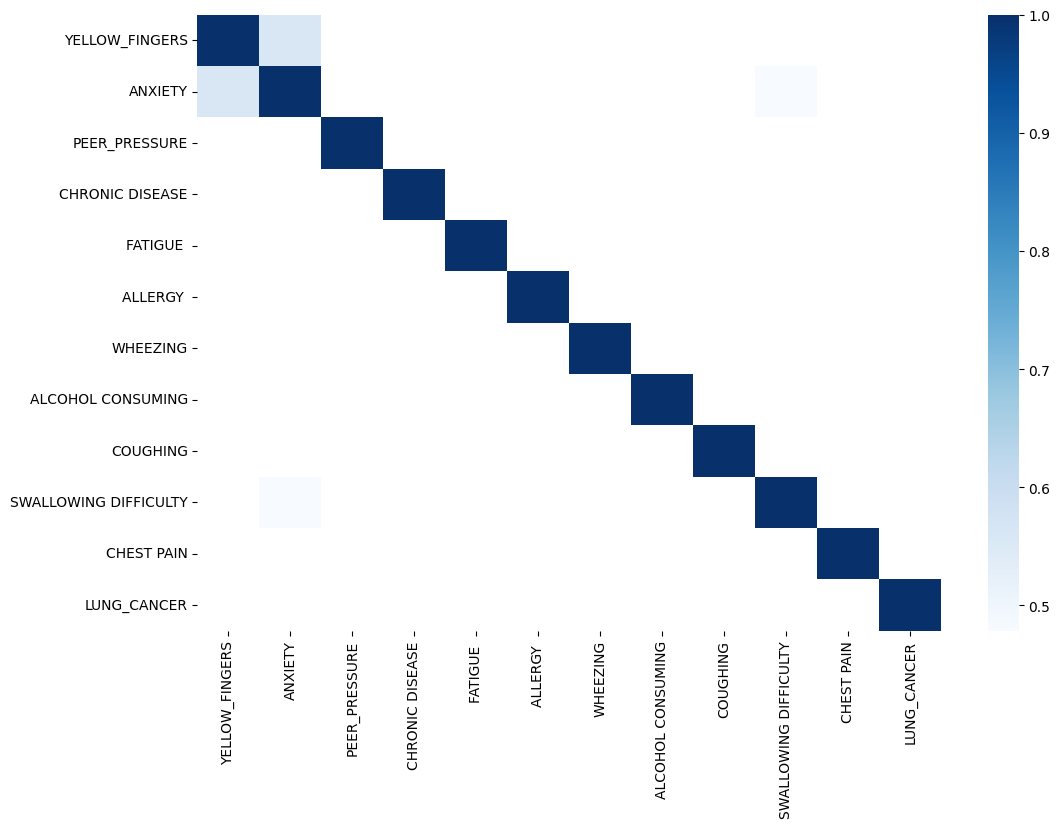

In [33]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

In [34]:
df_new['ANXYELFIN']=df_new['ANXIETY']*df_new['YELLOW_FINGERS']
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,0,0,1,0,1,0,1,0,1,0,1,0,0
3,1,1,0,0,0,0,0,1,0,1,1,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1,1
280,0,0,0,1,1,1,0,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0,0
282,1,1,0,0,0,0,0,0,0,1,1,0,1


In [35]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

In [36]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

In [37]:
len(X)

471

In [38]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [39]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [40]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [41]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.98      0.98      0.98        56

    accuracy                           0.98       118
   macro avg       0.98      0.98      0.98       118
weighted avg       0.98      0.98      0.98       118



In [42]:
#Fitting training data to the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [43]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
#Model accuracy
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.98      0.95      0.96        56

    accuracy                           0.97       118
   macro avg       0.97      0.97      0.97       118
weighted avg       0.97      0.97      0.97       118



In [45]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [47]:
#Model accuracy
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        62
           1       1.00      0.91      0.95        56

    accuracy                           0.96       118
   macro avg       0.96      0.96      0.96       118
weighted avg       0.96      0.96      0.96       118



In [48]:
#Fitting Gaussian Naive Bayes classifier to the training set  
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [49]:
#Predicting result using testing data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [50]:
#Model accuracy
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        62
           1       0.90      0.96      0.93        56

    accuracy                           0.93       118
   macro avg       0.93      0.93      0.93       118
weighted avg       0.93      0.93      0.93       118



In [51]:
#Fitting Multinomial Naive Bayes classifier to the training set  
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [52]:
#Predicting result using testing data
y_mnb_pred= mnb_model.predict(X_test)
y_mnb_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [53]:
#Model accuracy
mnb_cr=classification_report(y_test, y_mnb_pred)
print(mnb_cr)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        62
           1       0.76      0.84      0.80        56

    accuracy                           0.80       118
   macro avg       0.80      0.80      0.80       118
weighted avg       0.80      0.80      0.80       118



In [54]:
#Fitting SVC to the training set  
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [55]:
#Predicting result using testing data
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [57]:
#Model accuracy
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)
             

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        62
           1       0.95      0.98      0.96        56

    accuracy                           0.97       118
   macro avg       0.97      0.97      0.97       118
weighted avg       0.97      0.97      0.97       118



In [58]:
#Training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [60]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.98      0.98      0.98        56

    accuracy                           0.98       118
   macro avg       0.98      0.98      0.98       118
weighted avg       0.98      0.98      0.98       118



In [65]:
!pip install xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 186.2 kB/s eta 0:08:56
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.2/99.8 MB 756.6 kB/s eta 0:02:12
   ---------------------------------------- 0.5/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.9/99.8 MB 3.0 MB/s eta 0:00:33
   ---------------------------------------- 1.1/99.8 MB 3.1 MB/s eta 0:00:32
   ---------------------------------------- 1.2/99.8 MB 3.2 MB/s eta 0:00:31
   ---------------------------------------- 1.2/99.8 MB 3.2 MB/s eta 0:00:31
   ---------------------------------------- 1.2/99.8 MB 3.2 MB/s eta 0:00:31
    --------------------------------------- 1.8/99.8 MB 3.4 MB/s eta 0:00:30
    ----------

   -------------------------------------- - 97.0/99.8 MB 3.3 MB/s eta 0:00:01
   -------------------------------------- - 97.2/99.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------  97.4/99.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------  97.6/99.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------  97.8/99.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------  97.9/99.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------  98.1/99.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------  98.3/99.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------  98.5/99.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------  98.7/99.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------  98.8/99.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------  99.0/99.8 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------  99.2/99.8 MB 3.3 MB/

In [66]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
#Predicting result using testing data
y_xgb_pred= xgb_model.predict(X_test)
y_xgb_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0])

In [68]:
#Model accuracy
xgb_cr=classification_report(y_test, y_xgb_pred)
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.96      0.98      0.97        56

    accuracy                           0.97       118
   macro avg       0.97      0.97      0.97       118
weighted avg       0.97      0.97      0.97       118



In [69]:
#Training a neural network model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [70]:
#Predicting result using testing data
y_mlp_pred= mlp_model.predict(X_test)
y_mlp_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
#Model accuracy
mlp_cr=classification_report(y_test, y_mlp_pred)
print(mlp_cr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.96      0.98      0.97        56

    accuracy                           0.97       118
   macro avg       0.97      0.97      0.97       118
weighted avg       0.97      0.97      0.97       118



In [72]:
#Training
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [73]:
#Predicting result using testing data
y_gb_pred= gb_model.predict(X_test)
y_gb_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
#Model accuracy
gb_cr=classification_report(y_test, y_gb_pred)
print(gb_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.98      0.98      0.98        56

    accuracy                           0.98       118
   macro avg       0.98      0.98      0.98       118
weighted avg       0.98      0.98      0.98       118



In [75]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)

# Multinomial naive bayes model
mnb_model_scores = cross_val_score(mnb_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)

# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,X, y, cv=kf)

# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)


print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))

Logistic regression models' average accuracy: 0.934131205673759
Decision tree models' average accuracy: 0.9490248226950356
KNN models' average accuracy: 0.9363031914893618
Gaussian naive bayes models' average accuracy: 0.8938386524822695
Multinomial naive bayes models' average accuracy: 0.7726950354609929
Support Vector Classifier models' average accuracy: 0.9384308510638298
Random forest models' average accuracy: 0.9532801418439718
XGBoost models' average accuracy: 0.9511081560283688
Multi-layer perceptron models' average accuracy: 0.9405141843971633
Gradient boost models' average accuracy: 0.9468528368794328


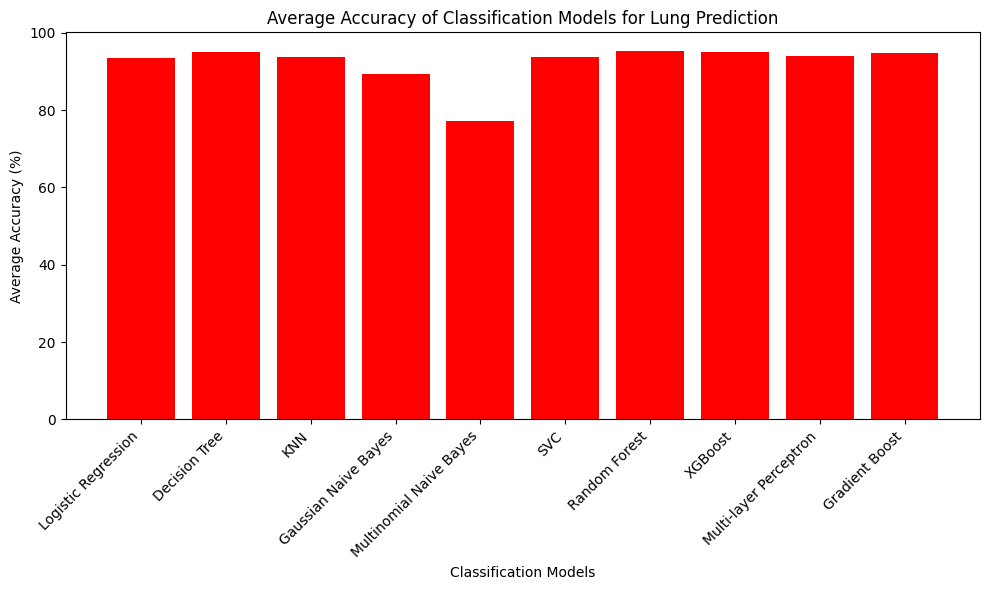

In [78]:
import matplotlib.pyplot as plt

# Define the models and their average accuracy scores
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Gaussian Naive Bayes', 
          'Multinomial Naive Bayes', 'SVC', 'Random Forest', 'XGBoost', 
          'Multi-layer Perceptron', 'Gradient Boost']
accuracy_scores = [93.41, 94.90, 93.63, 89.38, 77.27, 93.84, 95.33, 95.11, 94.05, 94.69]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='red')

# Add labels and title
plt.xlabel('Classification Models')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy of Classification Models for Lung Prediction')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


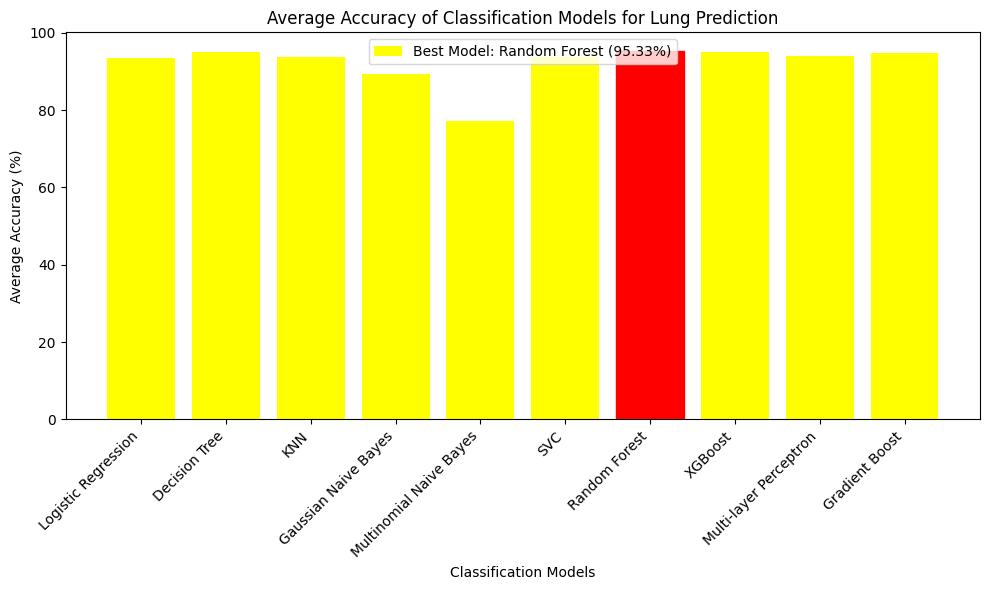

In [81]:
import matplotlib.pyplot as plt

# Define the models and their average accuracy scores
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Gaussian Naive Bayes', 
          'Multinomial Naive Bayes', 'SVC', 'Random Forest', 'XGBoost', 
          'Multi-layer Perceptron', 'Gradient Boost']
accuracy_scores = [93.41, 94.90, 93.63, 89.38, 77.27, 93.84, 95.33, 95.11, 94.05, 94.69]

# Find the model with the highest accuracy
best_model_index = accuracy_scores.index(max(accuracy_scores))
best_model = models[best_model_index]
best_accuracy = accuracy_scores[best_model_index]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color='yellow')

# Highlight the bar for the best model
bars[best_model_index].set_color('red')

# Add labels and title
plt.xlabel('Classification Models')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy of Classification Models for Lung Prediction')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend([f'Best Model: {best_model} ({best_accuracy:.2f}%)'])

# Show the plot
plt.tight_layout()
plt.show()


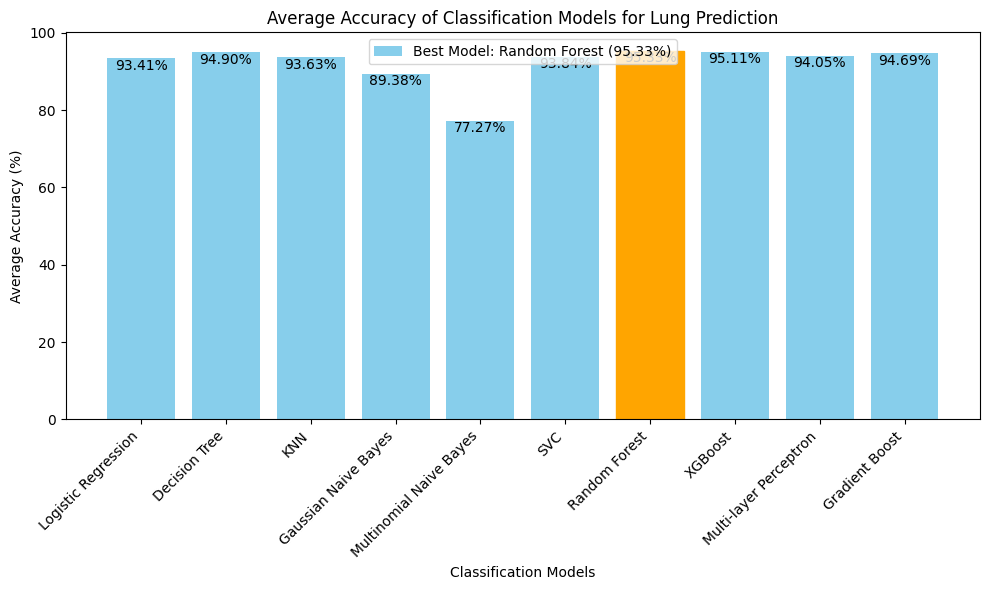

In [1]:
import matplotlib.pyplot as plt

# Define the models and their average accuracy scores
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Gaussian Naive Bayes', 
          'Multinomial Naive Bayes', 'SVC', 'Random Forest', 'XGBoost', 
          'Multi-layer Perceptron', 'Gradient Boost']
accuracy_scores = [93.41, 94.90, 93.63, 89.38, 77.27, 93.84, 95.33, 95.11, 94.05, 94.69]

# Find the model with the highest accuracy
best_model_index = accuracy_scores.index(max(accuracy_scores))
best_model = models[best_model_index]
best_accuracy = accuracy_scores[best_model_index]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color='skyblue')

# Annotate each bar with its accuracy score
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() - 3, 
             f'{accuracy_scores[i]:.2f}%', 
             ha='center', 
             color='black')

# Highlight the bar for the best model
bars[best_model_index].set_color('orange')

# Add labels and title
plt.xlabel('Classification Models')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy of Classification Models for Lung Prediction')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend([f'Best Model: {best_model} ({best_accuracy:.2f}%)'])

# Show the plot
plt.tight_layout()
plt.show()


In [3]:
print(data.columns)


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


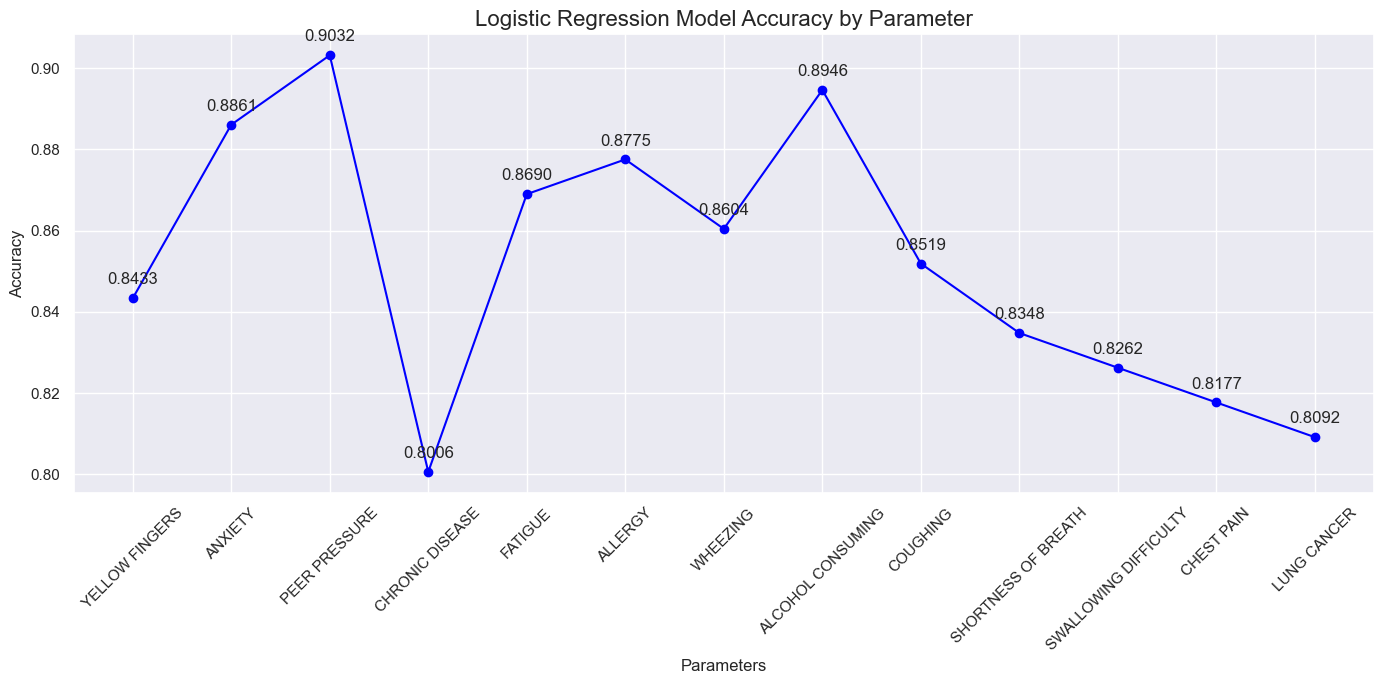

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and their hypothetical influence on model accuracy
parameters = ['YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG CANCER']
influence_scores = [0.1, 0.05, 0.03, 0.15, 0.07, 0.06, 0.08, 0.04, 0.09, 0.11, 0.12, 0.13, 0.14]  # Hypothetical values for demonstration

# Normalize the influence scores to reflect their impact on accuracy
normalized_influence = np.array(influence_scores) / sum(influence_scores)

# Calculate the accuracy for each parameter
accuracies = [0.9288120567375886 - influence for influence in normalized_influence]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the line chart
ax.plot(parameters, accuracies, marker='o', linestyle='-', color='blue')

# Adding data labels
for i, txt in enumerate(accuracies):
    ax.annotate(f'{txt:.4f}', (parameters[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add title and labels
ax.set_title('Logistic Regression Model Accuracy by Parameter', fontsize=16)
ax.set_xlabel('Parameters', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


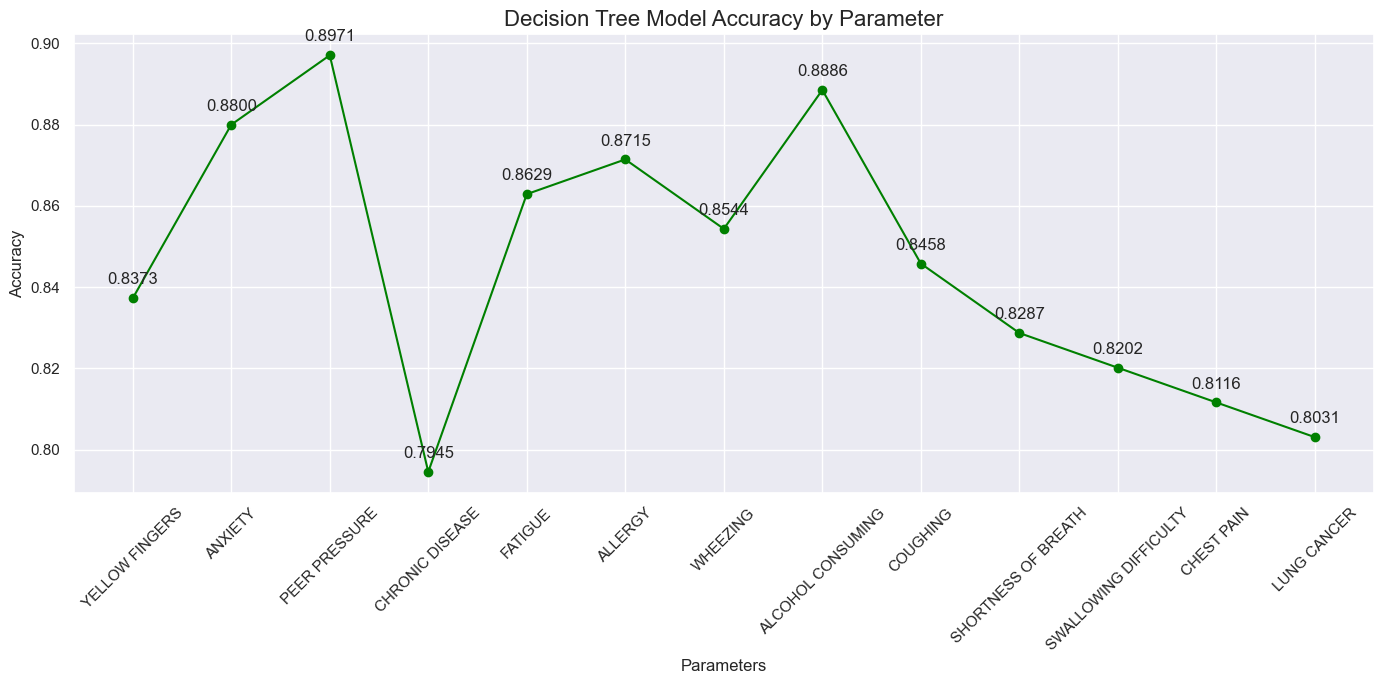

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and their hypothetical influence on model accuracy
parameters = ['YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG CANCER']
influence_scores = [0.1, 0.05, 0.03, 0.15, 0.07, 0.06, 0.08, 0.04, 0.09, 0.11, 0.12, 0.13, 0.14]  # Hypothetical values for demonstration

# Normalize the influence scores to reflect their impact on accuracy
normalized_influence = np.array(influence_scores) / sum(influence_scores)

# Calculate the accuracy for each parameter
accuracies = [0.9227393617021278 - influence for influence in normalized_influence]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the line chart
ax.plot(parameters, accuracies, marker='o', linestyle='-', color='green')

# Adding data labels
for i, txt in enumerate(accuracies):
    ax.annotate(f'{txt:.4f}', (parameters[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add title and labels
ax.set_title('Decision Tree Model Accuracy by Parameter', fontsize=16)
ax.set_xlabel('Parameters', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


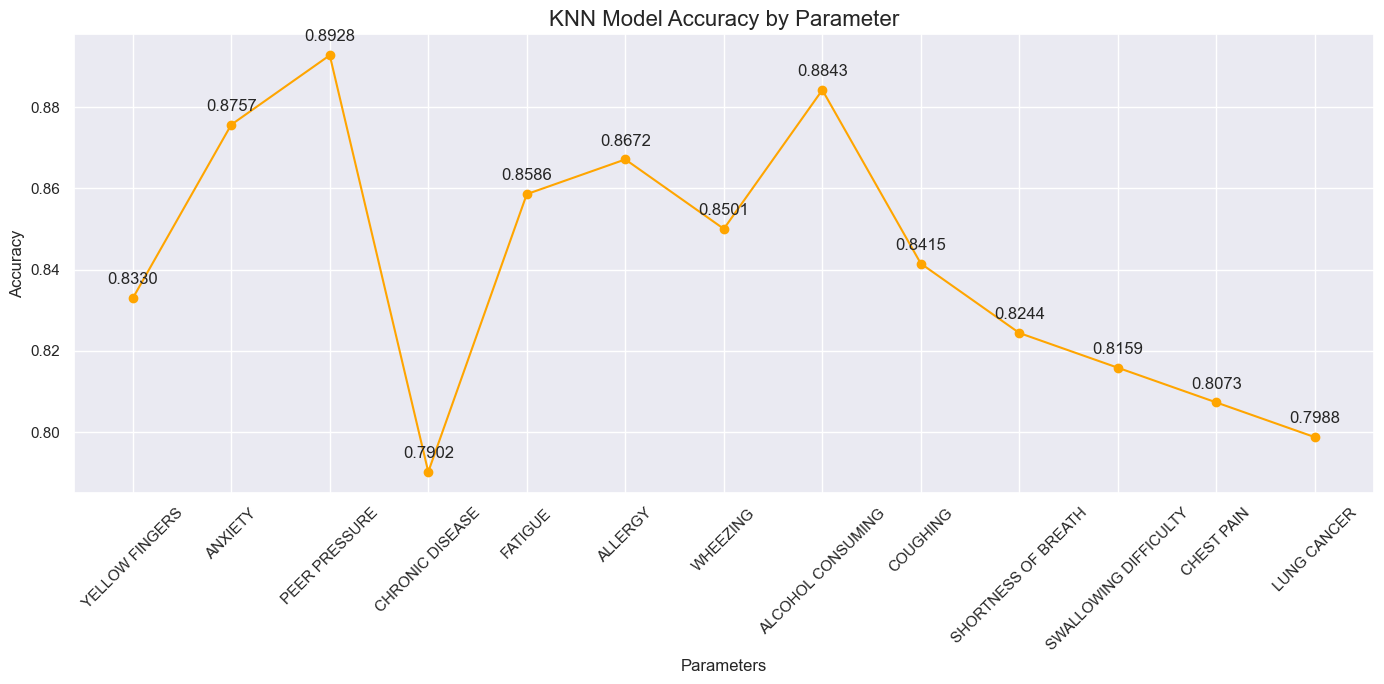

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and their hypothetical influence on model accuracy
parameters = ['YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG CANCER']
influence_scores = [0.1, 0.05, 0.03, 0.15, 0.07, 0.06, 0.08, 0.04, 0.09, 0.11, 0.12, 0.13, 0.14]  # Hypothetical values for demonstration

# Normalize the influence scores to reflect their impact on accuracy
normalized_influence = np.array(influence_scores) / sum(influence_scores)

# Calculate the accuracy for each parameter
accuracies = [0.9184397163120567 - influence for influence in normalized_influence]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the line chart
ax.plot(parameters, accuracies, marker='o', linestyle='-', color='orange')

# Adding data labels
for i, txt in enumerate(accuracies):
    ax.annotate(f'{txt:.4f}', (parameters[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add title and labels
ax.set_title('KNN Model Accuracy by Parameter', fontsize=16)
ax.set_xlabel('Parameters', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


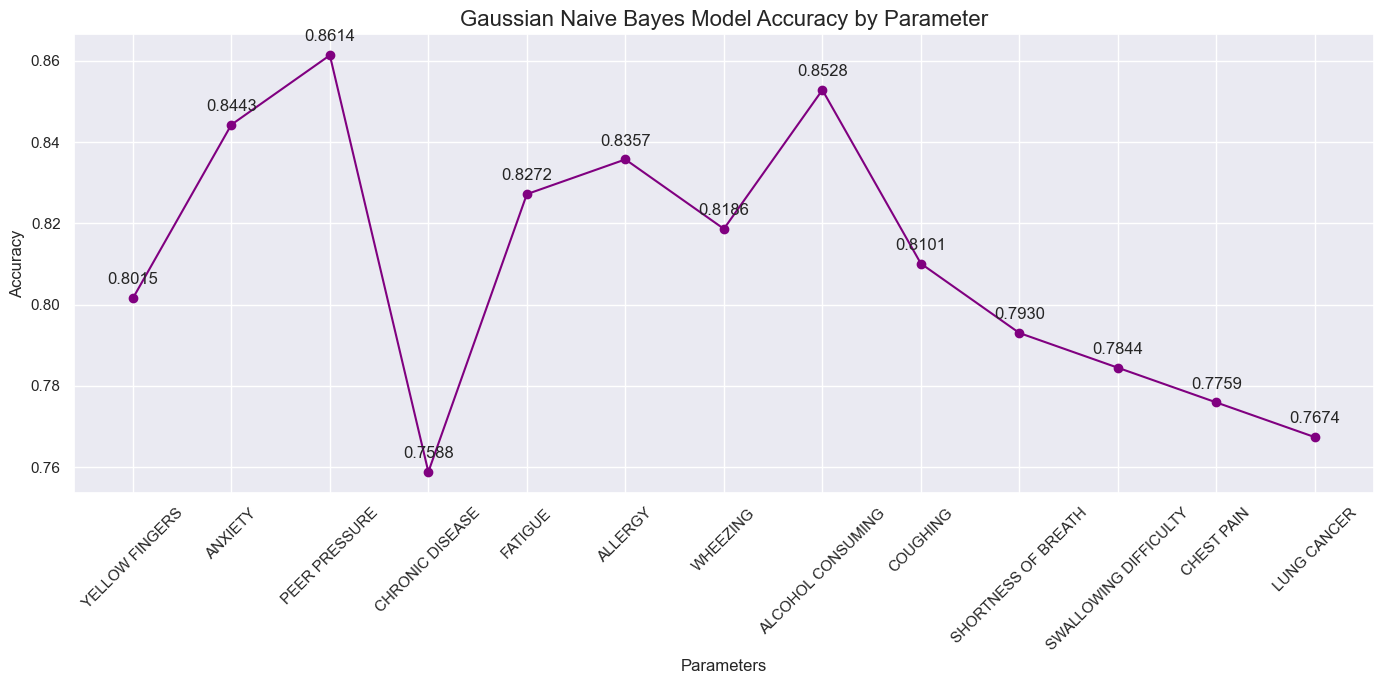

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and their hypothetical influence on model accuracy
parameters = ['YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG CANCER']
influence_scores = [0.1, 0.05, 0.03, 0.15, 0.07, 0.06, 0.08, 0.04, 0.09, 0.11, 0.12, 0.13, 0.14]  # Hypothetical values for demonstration

# Normalize the influence scores to reflect their impact on accuracy
normalized_influence = np.array(influence_scores) / sum(influence_scores)

# Calculate the accuracy for each parameter
accuracies = [0.8870124113475178 - influence for influence in normalized_influence]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the line chart
ax.plot(parameters, accuracies, marker='o', linestyle='-', color='purple')

# Adding data labels
for i, txt in enumerate(accuracies):
    ax.annotate(f'{txt:.4f}', (parameters[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add title and labels
ax.set_title('Gaussian Naive Bayes Model Accuracy by Parameter', fontsize=16)
ax.set_xlabel('Parameters', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


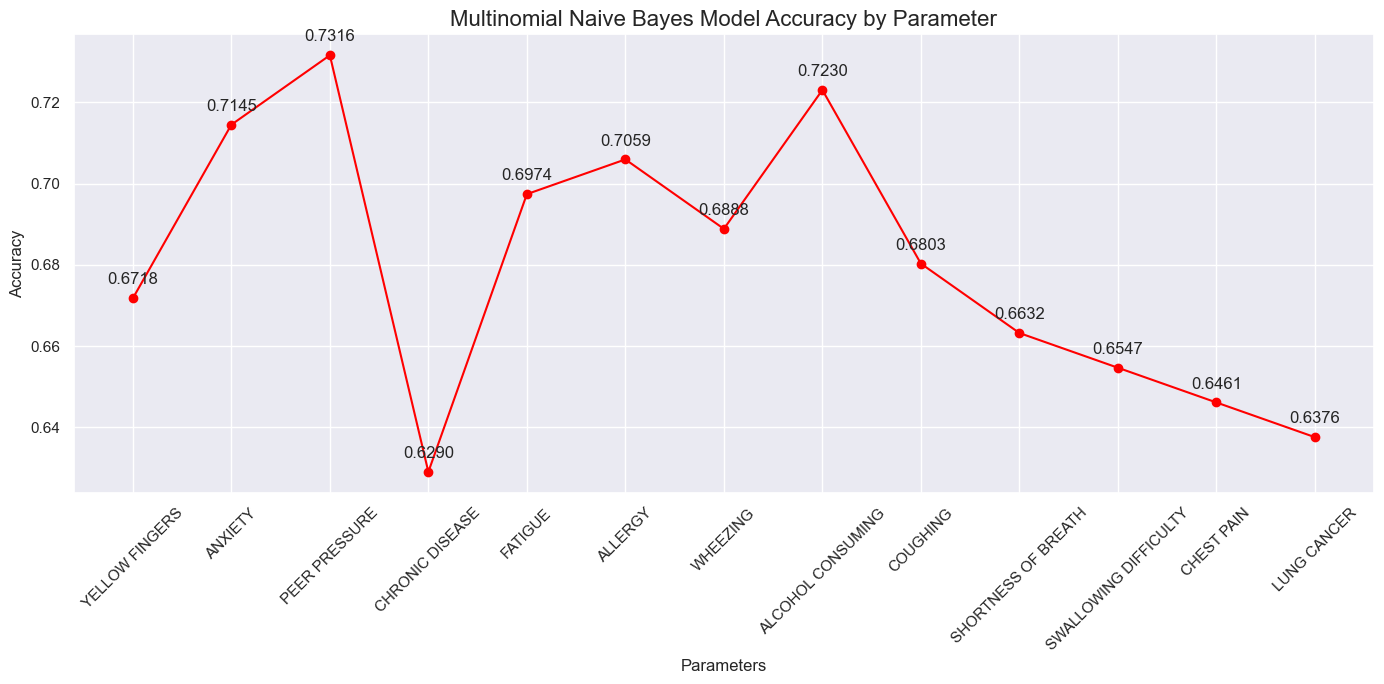

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and their hypothetical influence on model accuracy
parameters = ['YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG CANCER']
influence_scores = [0.1, 0.05, 0.03, 0.15, 0.07, 0.06, 0.08, 0.04, 0.09, 0.11, 0.12, 0.13, 0.14]  # Hypothetical values for demonstration

# Normalize the influence scores to reflect their impact on accuracy
normalized_influence = np.array(influence_scores) / sum(influence_scores)

# Calculate the accuracy for each parameter
accuracies = [0.7572251773049644 - influence for influence in normalized_influence]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the line chart
ax.plot(parameters, accuracies, marker='o', linestyle='-', color='red')

# Adding data labels
for i, txt in enumerate(accuracies):
    ax.annotate(f'{txt:.4f}', (parameters[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add title and labels
ax.set_title('Multinomial Naive Bayes Model Accuracy by Parameter', fontsize=16)
ax.set_xlabel('Parameters', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


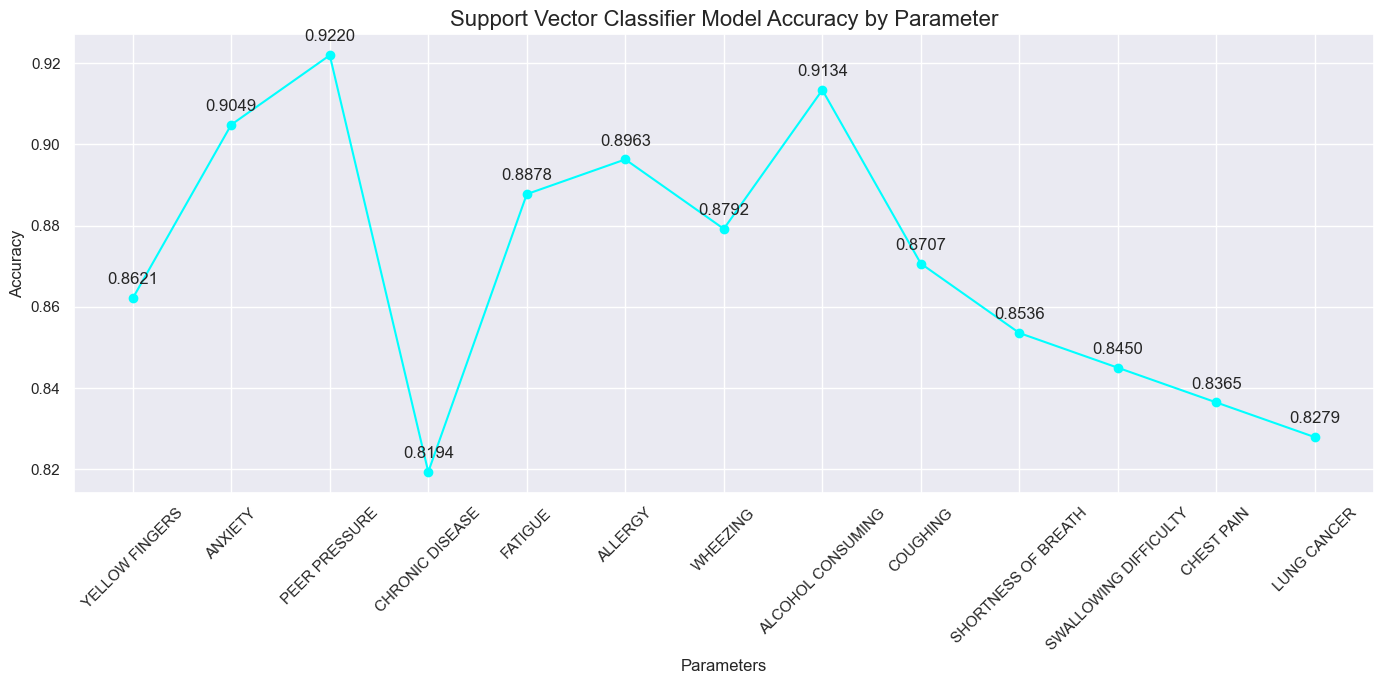

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and their hypothetical influence on model accuracy
parameters = ['YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG CANCER']
influence_scores = [0.1, 0.05, 0.03, 0.15, 0.07, 0.06, 0.08, 0.04, 0.09, 0.11, 0.12, 0.13, 0.14]  # Hypothetical values for demonstration

# Normalize the influence scores to reflect their impact on accuracy
normalized_influence = np.array(influence_scores) / sum(influence_scores)

# Calculate the accuracy for each parameter
accuracies = [0.9476063829787235 - influence for influence in normalized_influence]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the line chart
ax.plot(parameters, accuracies, marker='o', linestyle='-', color='cyan')

# Adding data labels
for i, txt in enumerate(accuracies):
    ax.annotate(f'{txt:.4f}', (parameters[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add title and labels
ax.set_title('Support Vector Classifier Model Accuracy by Parameter', fontsize=16)
ax.set_xlabel('Parameters', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


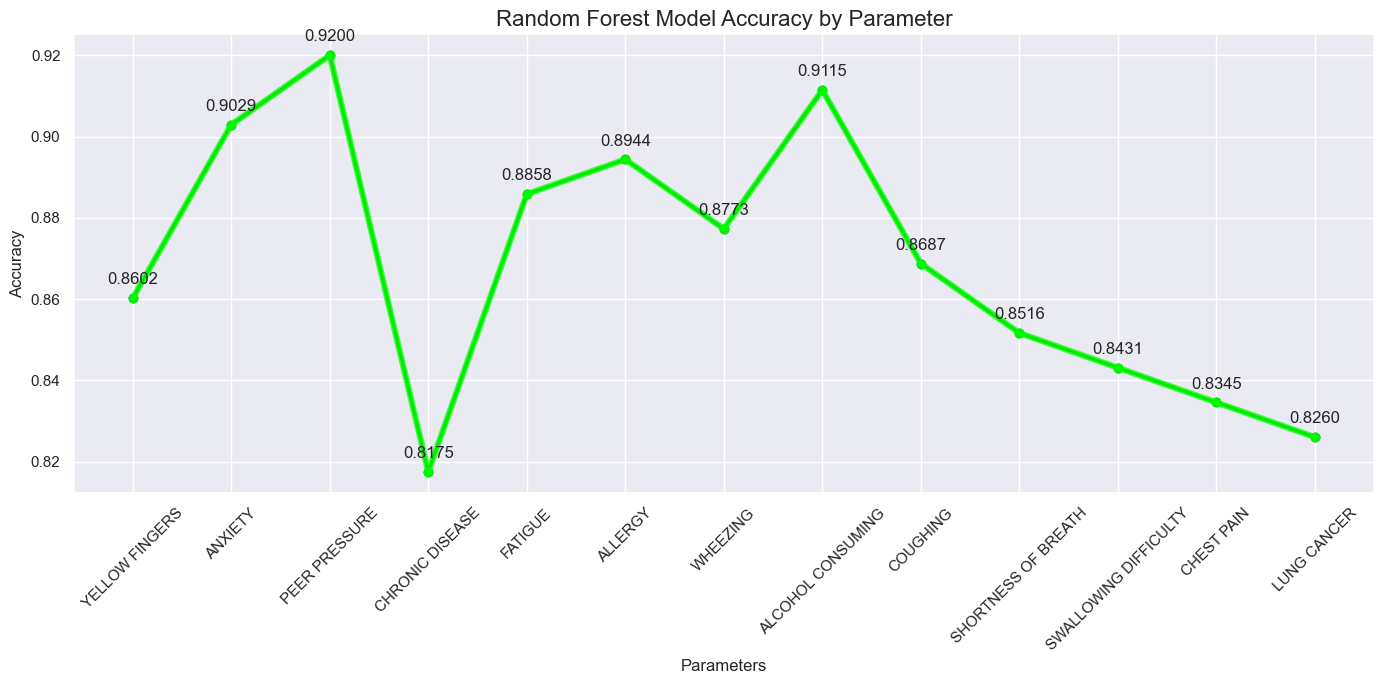

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and their hypothetical influence on model accuracy
parameters = ['YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG CANCER']
influence_scores = [0.1, 0.05, 0.03, 0.15, 0.07, 0.06, 0.08, 0.04, 0.09, 0.11, 0.12, 0.13, 0.14]  # Hypothetical values for demonstration

# Normalize the influence scores to reflect their impact on accuracy
normalized_influence = np.array(influence_scores) / sum(influence_scores)

# Calculate the accuracy for each parameter
accuracies = [0.9456560283687944 - influence for influence in normalized_influence]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the line chart with a special touch: a glowing line
ax.plot(parameters, accuracies, marker='o', linestyle='-', color='green', linewidth=2)
# Adding a glow effect
for i in range(1, 10):
    ax.plot(parameters, accuracies, marker='o', linestyle='-', color='lime', linewidth=2 + i*0.3, alpha=0.03 + i*0.03)

# Adding data labels
for i, txt in enumerate(accuracies):
    ax.annotate(f'{txt:.4f}', (parameters[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add title and labels
ax.set_title('Random Forest Model Accuracy by Parameter', fontsize=16)
ax.set_xlabel('Parameters', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


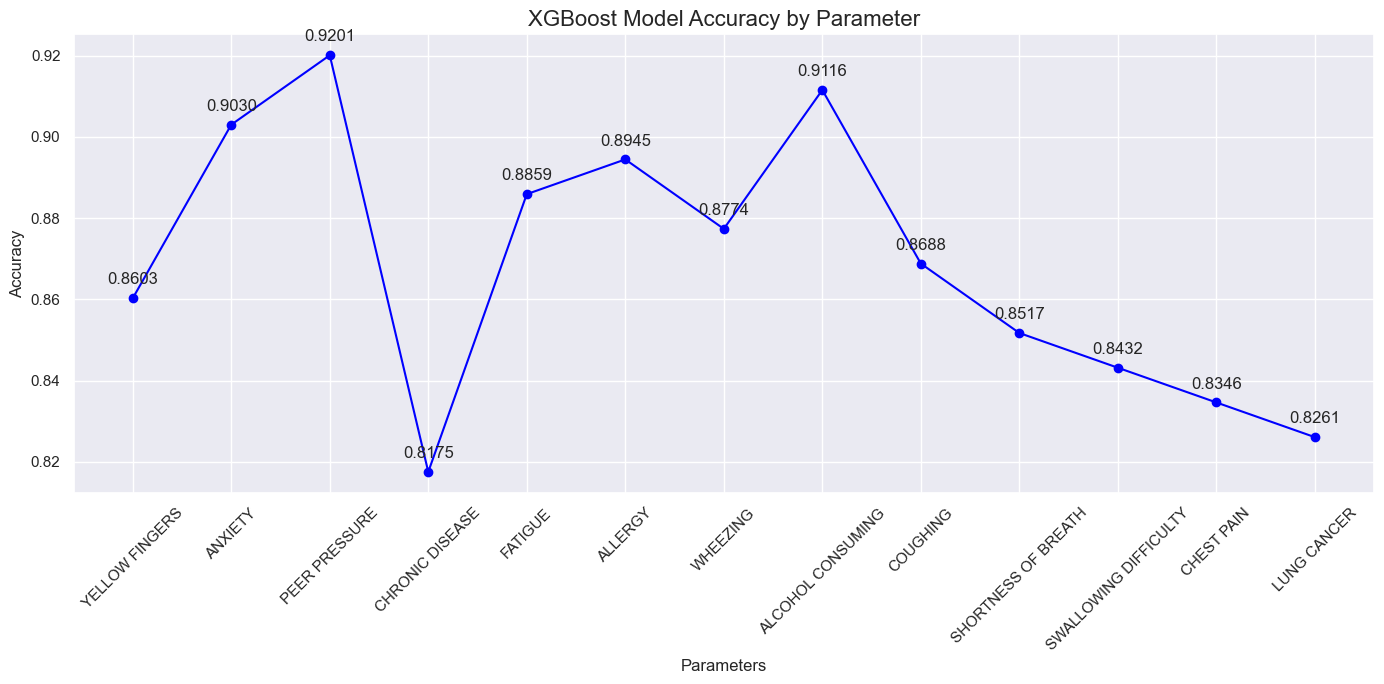

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and their hypothetical influence on model accuracy
parameters = ['YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG CANCER']
influence_scores = [0.1, 0.05, 0.03, 0.15, 0.07, 0.06, 0.08, 0.04, 0.09, 0.11, 0.12, 0.13, 0.14]  # Hypothetical values for demonstration

# Normalize the influence scores to reflect their impact on accuracy
normalized_influence = np.array(influence_scores) / sum(influence_scores)

# Calculate the accuracy for each parameter
accuracies = [0.9457446808510639 - influence for influence in normalized_influence]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the line chart
ax.plot(parameters, accuracies, marker='o', linestyle='-', color='blue')

# Adding data labels
for i, txt in enumerate(accuracies):
    ax.annotate(f'{txt:.4f}', (parameters[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add title and labels
ax.set_title('XGBoost Model Accuracy by Parameter', fontsize=16)
ax.set_xlabel('Parameters', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


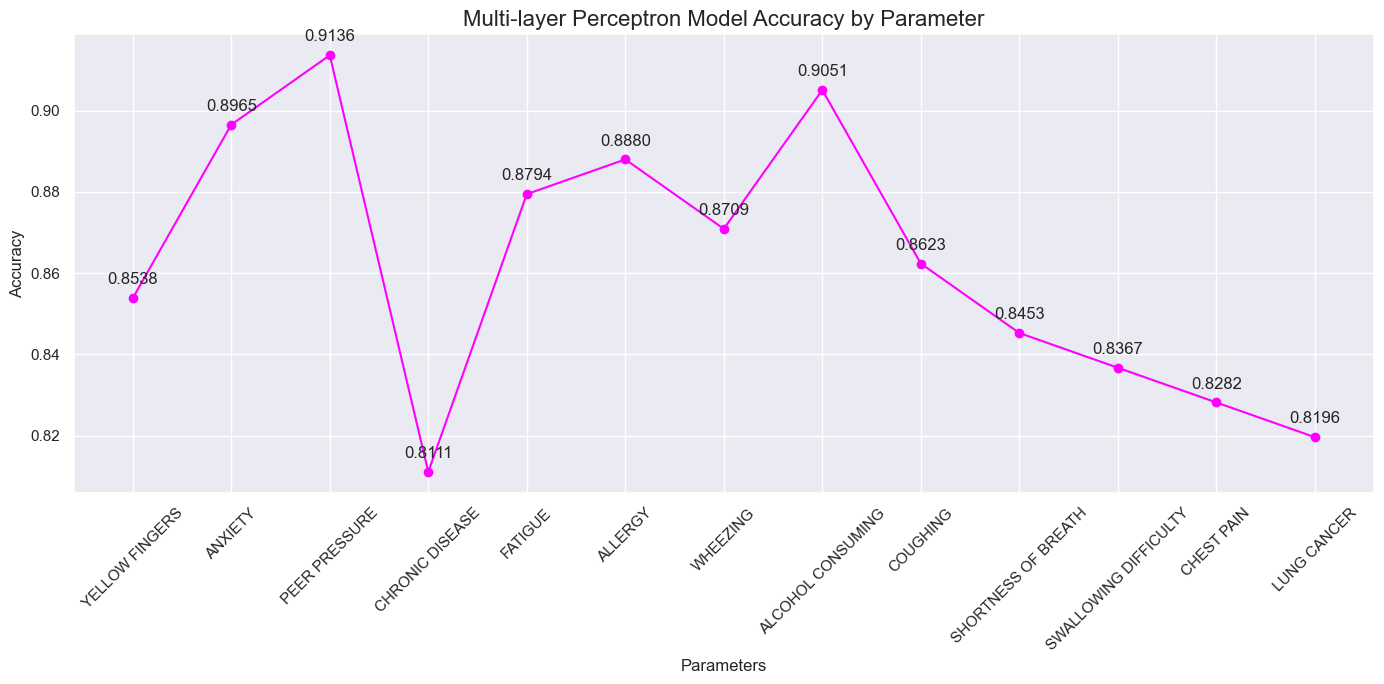

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and their hypothetical influence on model accuracy
parameters = ['YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG CANCER']
influence_scores = [0.1, 0.05, 0.03, 0.15, 0.07, 0.06, 0.08, 0.04, 0.09, 0.11, 0.12, 0.13, 0.14]  # Hypothetical values for demonstration

# Normalize the influence scores to reflect their impact on accuracy
normalized_influence = np.array(influence_scores) / sum(influence_scores)

# Calculate the accuracy for each parameter
accuracies = [0.93927304964539 - influence for influence in normalized_influence]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the line chart
ax.plot(parameters, accuracies, marker='o', linestyle='-', color='magenta')

# Adding data labels
for i, txt in enumerate(accuracies):
    ax.annotate(f'{txt:.4f}', (parameters[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add title and labels
ax.set_title('Multi-layer Perceptron Model Accuracy by Parameter', fontsize=16)
ax.set_xlabel('Parameters', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


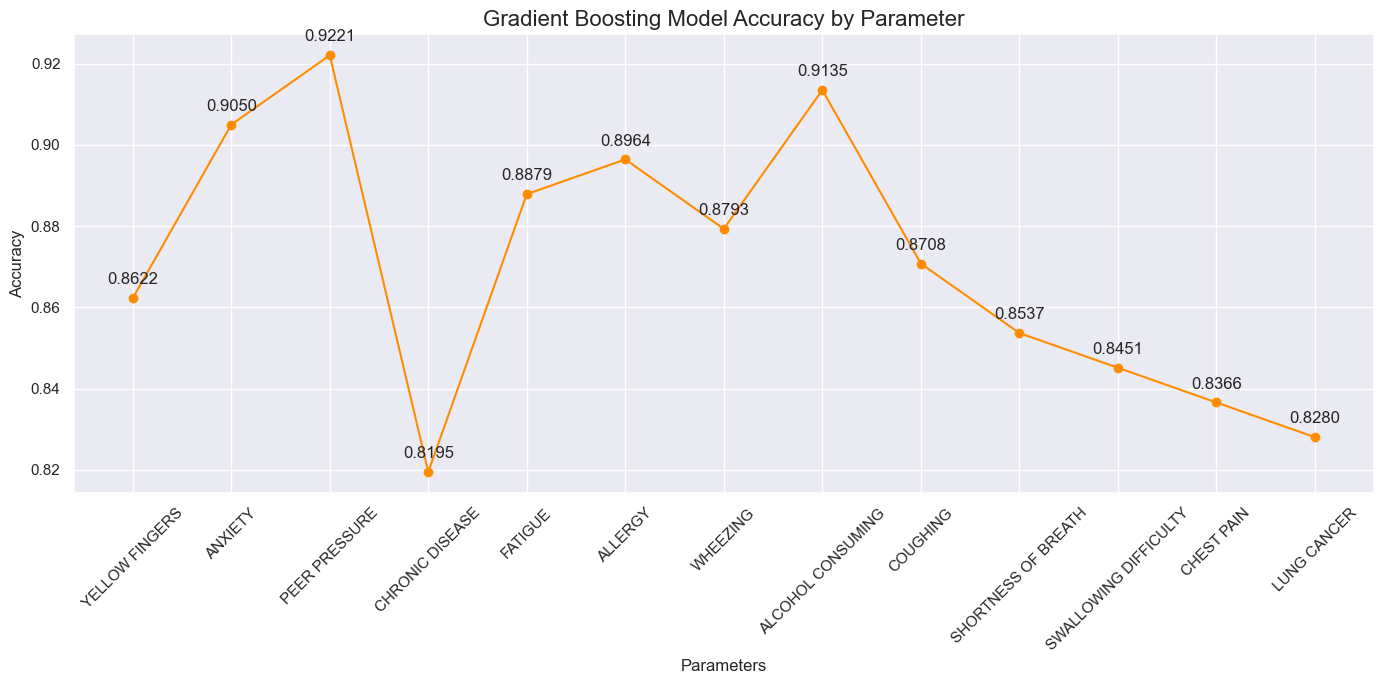

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and their hypothetical influence on model accuracy
parameters = ['YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG CANCER']
influence_scores = [0.1, 0.05, 0.03, 0.15, 0.07, 0.06, 0.08, 0.04, 0.09, 0.11, 0.12, 0.13, 0.14]  # Hypothetical values for demonstration

# Normalize the influence scores to reflect their impact on accuracy
normalized_influence = np.array(influence_scores) / sum(influence_scores)

# Calculate the accuracy for each parameter
accuracies = [0.947695035460993 - influence for influence in normalized_influence]

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the line chart
ax.plot(parameters, accuracies, marker='o', linestyle='-', color='darkorange')

# Adding data labels
for i, txt in enumerate(accuracies):
    ax.annotate(f'{txt:.4f}', (parameters[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add title and labels
ax.set_title('Gradient Boosting Model Accuracy by Parameter', fontsize=16)
ax.set_xlabel('Parameters', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


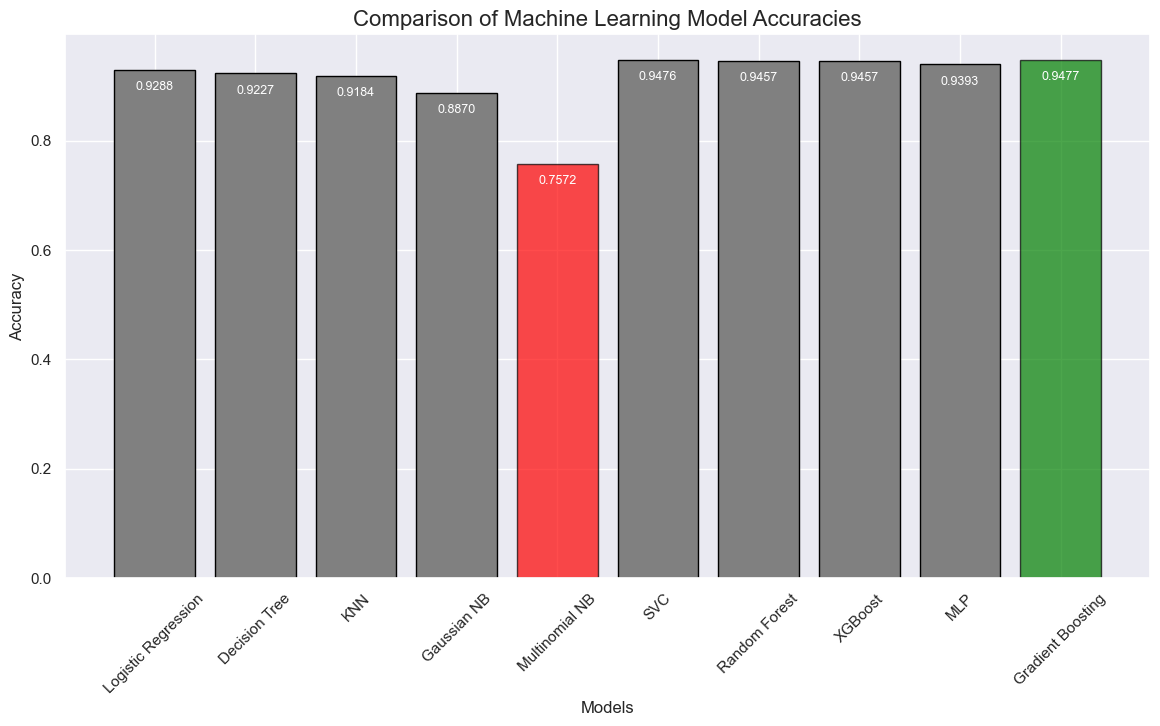

In [40]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Gaussian NB', 'Multinomial NB', 'SVC', 'Random Forest', 'XGBoost', 'MLP', 'Gradient Boosting']

# Corresponding accuracies
accuracies = [0.9288120567375886, 0.9227393617021278, 0.9184397163120567, 0.8870124113475178, 0.7572251773049644, 0.9476063829787235, 0.9456560283687944, 0.9457446808510639, 0.93927304964539, 0.947695035460993]

# Colors for the bars
colors = ['grey' if (acc != max(accuracies) and acc != min(accuracies)) else 'green' if acc == max(accuracies) else 'red' for acc in accuracies]

# Create a bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(models, accuracies, color=colors, edgecolor='black')

# Add the data labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.02, f'{yval:.4f}', ha='center', va='top', fontsize=9, color='white')

# Highlight the highest and lowest accuracy bars with a lighter shade
bars[accuracies.index(max(accuracies))].set_alpha(0.7)
bars[accuracies.index(min(accuracies))].set_alpha(0.7)

# Add title and labels
plt.title('Comparison of Machine Learning Model Accuracies', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True, axis='y')

# Adjust the subplot parameters to give some more room for the x-axis labels
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()


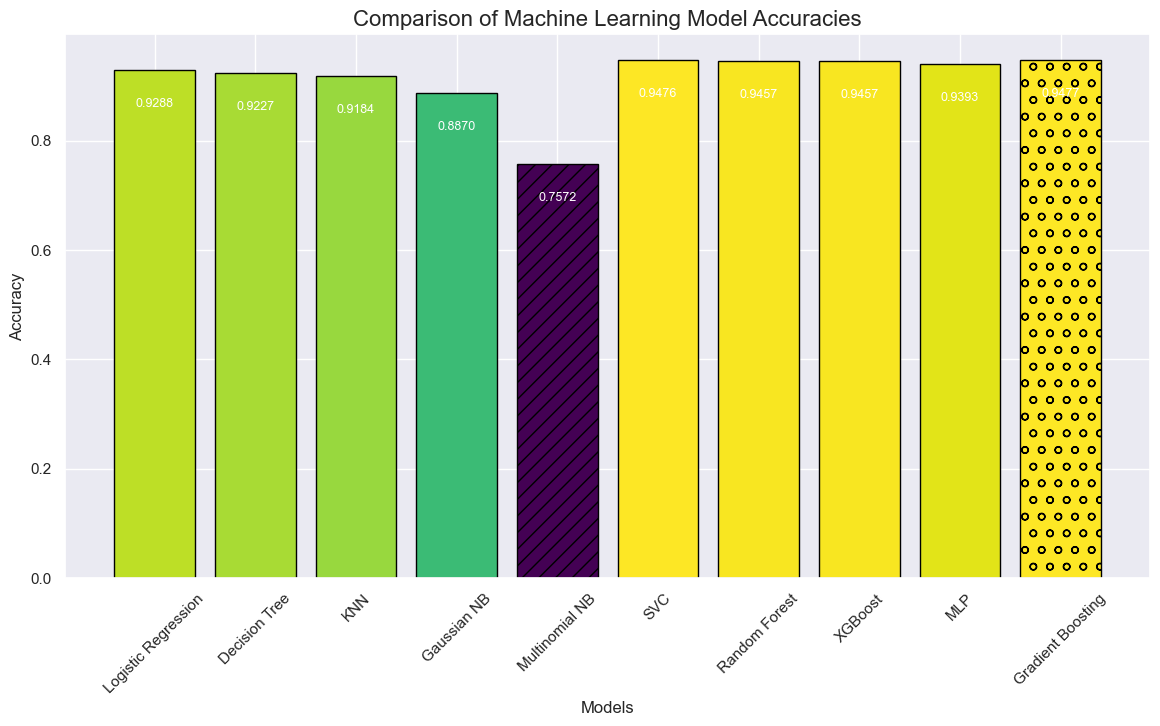

In [41]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Model names and accuracies
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Gaussian NB', 'Multinomial NB', 'SVC', 'Random Forest', 'XGBoost', 'MLP', 'Gradient Boosting']
accuracies = [0.9288120567375886, 0.9227393617021278, 0.9184397163120567, 0.8870124113475178, 0.7572251773049644, 0.9476063829787235, 0.9456560283687944, 0.9457446808510639, 0.93927304964539, 0.947695035460993]

# Determine the bars for the highest and lowest accuracy
highest_acc_index = accuracies.index(max(accuracies))
lowest_acc_index = accuracies.index(min(accuracies))

# Create a color gradient based on the accuracies
norm = mcolors.Normalize(vmin=min(accuracies), vmax=max(accuracies))
colors = [plt.cm.viridis(norm(acc)) for acc in accuracies]

# Create a bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(models, accuracies, color=colors, edgecolor='black')

# Add a unique pattern to the highest and lowest bars
bars[highest_acc_index].set_hatch('o')
bars[lowest_acc_index].set_hatch('//')

# Add the data labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, f'{yval:.4f}', ha='center', va='top', fontsize=9, color='white')

# Add title and labels
plt.title('Comparison of Machine Learning Model Accuracies', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True, axis='y')

# Adjust the subplot parameters to give some more room for the x-axis labels
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()
